In [2]:
!wget https://raw.githubusercontent.com/GeorgeM2000/Classification-of-Bird-Recordings/main/birds_brown_creeper.csv

--2024-04-06 06:37:11--  https://raw.githubusercontent.com/GeorgeM2000/Classification-of-Bird-Recordings/main/birds_brown_creeper.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3143482 (3.0M) [text/plain]
Saving to: ‘birds_brown_creeper.csv’

birds_brown_creeper 100%[===================>]   3.00M  --.-KB/s    in 0.07s   

2024-04-06 06:37:11 (44.2 MB/s) - ‘birds_brown_creeper.csv’ saved [3143482/3143482]



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial.distance import directed_hausdorff

In [4]:
df = pd.read_csv("birds_brown_creeper.csv", header=None, on_bad_lines='skip')

df=df.rename(columns={0:'label',1:'bag'})
df=df.rename(columns=dict(zip(range(2,40),range(0,38))))

print(f"Examples per label:\n{df['label'].value_counts()}")
print()
print(f"Unique bags: {df['bag'].nunique()}")

Examples per label:
label
0    5226
1    5006
Name: count, dtype: int64

Unique bags: 548


In [5]:
display(df)

,label,bag,0,1,2,3,4,5,6,7,...,28,29,30,31,32,33,34,35,36,37
0,1,1,0.965614,0.943411,0.379381,0.432860,0.001019,0.082413,-0.000008,0.006523,...,0.038549,0.029478,0.079365,0.120181,0.095238,0.047619,0.049887,0.020408,0.034014,0.045351
1,1,1,0.967565,0.950808,0.405369,0.475816,0.001144,0.070473,0.000010,0.003011,...,0.063492,0.024691,0.082892,0.123457,0.081129,0.051146,0.037037,0.033510,0.029982,0.068783
2,1,1,0.952911,0.947422,0.394286,0.510015,0.000514,0.075422,0.000002,0.000494,...,0.047120,0.049738,0.083770,0.023560,0.065445,0.083770,0.054974,0.060209,0.054974,0.109948
3,1,1,0.951422,0.972968,0.401513,0.531201,0.000482,0.073074,-0.000001,-0.001808,...,0.020380,0.021739,0.047554,0.031250,0.065217,0.082880,0.191576,0.055707,0.028533,0.008152
4,1,1,0.952263,0.887658,0.423270,0.565426,0.000505,0.073105,-0.000001,-0.003650,...,0.028409,0.045455,0.232955,0.068182,0.039773,0.039773,0.028409,0.045455,0.039773,0.056818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10227,0,548,0.944063,0.912176,0.575621,0.503158,0.000370,0.080901,0.000000,0.000907,...,0.043269,0.048077,0.115385,0.091346,0.081731,0.038462,0.033654,0.033654,0.038462,0.076923
10228,0,548,0.985057,0.969313,0.845439,0.602794,0.008721,0.063828,-0.000657,-0.010000,...,0.037534,0.091153,0.175871,0.079893,0.032172,0.057909,0.028418,0.032708,0.039678,0.041287
10229,0,548,0.986260,0.941764,0.780768,0.322445,0.007284,0.045391,-0.000153,0.011332,...,0.046015,0.113394,0.197206,0.147905,0.020542,0.013147,0.010682,0.012325,0.021364,0.041906
10230,0,548,0.974982,0.887446,0.759451,0.519539,0.001834,0.076134,0.000008,-0.001731,...,0.019444,0.058333,0.238889,0.088889,0.019444,0.008333,0.002778,0.008333,0.013889,0.083333


In [6]:
df_bags = df.groupby(by=['bag'])
bagsizes = df_bags.size().value_counts().sort_index()

print("Bag Sizes\n")
print(f"Smallest bag size: {bagsizes.index.min()}\n Largest bag size: {bagsizes.index.max()}")

Bag Sizes

Smallest bag size: 2
 Largest bag size: 43


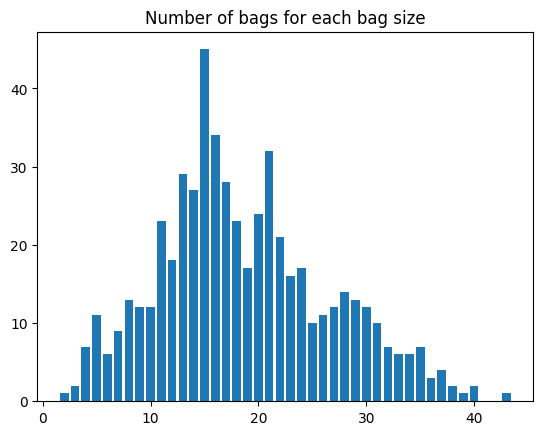

In [7]:
plt.bar(bagsizes.index,bagsizes)
plt.title("Number of bags for each bag size")
plt.show()